In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from anndata import AnnData
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

from numpy.random import default_rng
rng = default_rng(seed=12345)

# options
%matplotlib inline
plt.style.use("seaborn")
mpl.rcParams["figure.dpi"] = 110
warnings.filterwarnings("ignore")

CELL_TYPES = ["ES", "RS", "Myoid", "SPC", "SPG", "Sertoli", "Leydig", "Endothelial", "Macrophage"]
index = np.arange(len(CELL_TYPES))
name_to_index = dict(zip(CELL_TYPES, index))

def make_adata_from_df(df: pd.DataFrame) -> AnnData:
    return AnnData(
        #X=rng.standard_normal((df["cell_type"].shape[0],1)),
        obsm={"spatial": df[["x", "y"]].to_numpy()},
        obs=pd.DataFrame(df["cell_type"].apply(lambda x: CELL_TYPES[x-1]), dtype="category"))

### Read dataframe from file

In [4]:
df = pd.read_csv("./wt_1.csv")
df_ES=df[df["cell_type"] == 1]  # subset the dataframe
df_MA=df[df["cell_type"] == 9]  # subset the dataframe
df_ES_MA = pd.concat([df_ES, df_MA], sort=False)  # make dataframe with only ES and Macrophage

df.head()

,Unnamed: 0,barcode,cell_type,x,y
0,0,ACCTTTTTTTTTTT,1,2911.083333,3180.472222
1,1,CGGGATTTTTTTTT,2,3037.054795,4285.363014
2,2,CATTCATTTTTTTT,4,1664.345238,3552.726190
3,3,GGCTACTTTTTTTT,3,4048.823204,2583.165746
4,4,CTTGATGTTTTTTT,4,3072.972222,2726.277778


### Make adata

In [5]:
import anndata

adata = make_adata_from_df(df)
adata_ES_MA = make_adata_from_df(df_ES_MA)

In [6]:
adata

AnnData object with n_obs × n_vars = 31659 × 0
    obs: 'cell_type'
    obsm: 'spatial'

In [7]:
adata_ES_MA

AnnData object with n_obs × n_vars = 10749 × 0
    obs: 'cell_type'
    obsm: 'spatial'

### Visualize adata

Text(0.5, 1.0, 'ES and Macrophage only')

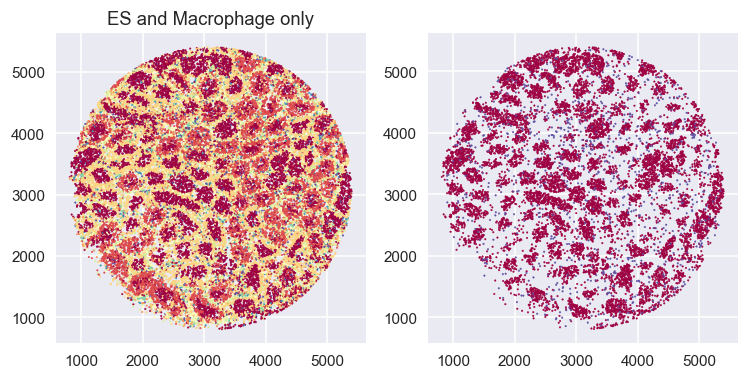

In [24]:
fig, ax =  plt.subplots(ncols=2, figsize=(8,8))

ax[0].scatter(adata.obsm['spatial'][:,0], 
              adata.obsm['spatial'][:,1], 
              c=[name_to_index[name] for name in adata.obs["cell_type"]],
              cmap='Spectral', s=1)
ax[0].set_aspect('equal', 'box')
ax[0].set_title("All cell types")

ax[1].scatter(adata_ES_MA.obsm['spatial'][:,0], 
              adata_ES_MA.obsm['spatial'][:,1], 
              c=[name_to_index[name] for name in adata_ES_MA.obs["cell_type"]],
              cmap='Spectral', s=1)
ax[1].set_aspect('equal', 'box')
ax[0].set_title("ES and Macrophage only")

### Co-occurrence subset version of dataset 

DEBUG LUCA: 245.08412 2268.8215


  0%|          | 0/1 [00:00<?, ?/s]

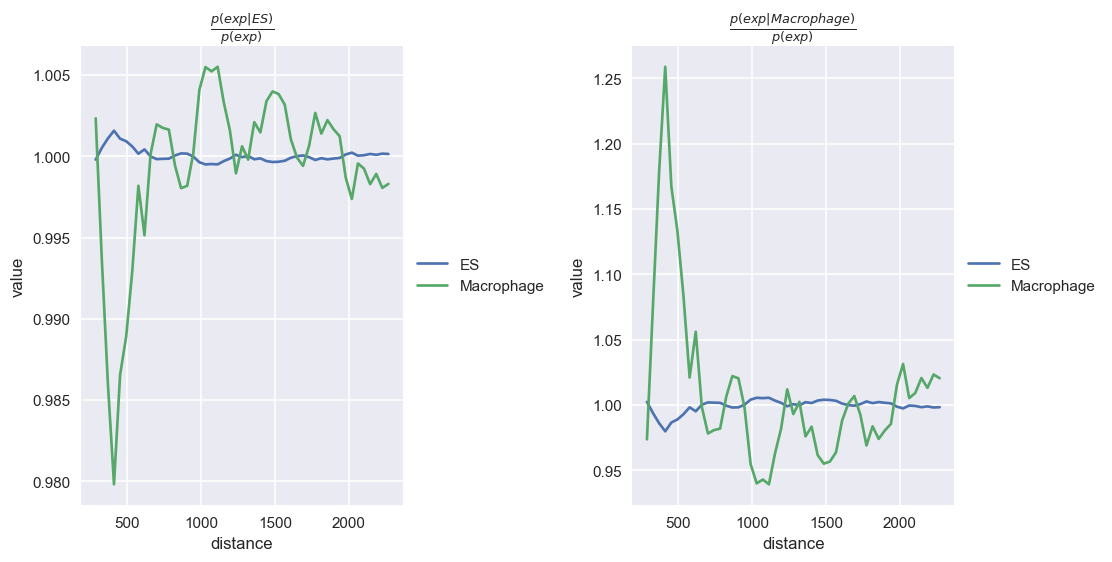

In [20]:
#sq.gr.co_occurrence(adata_ES_MA, cluster_key="cell_type", n_splits=25, n_steps=100) # why does this not work?
sq.gr.co_occurrence(adata_ES_MA, cluster_key="cell_type")
sq.pl.co_occurrence(adata_ES_MA, cluster_key="cell_type", clusters=["ES", "Macrophage"])

### Co-occurrence original dataset

preventing a NxN with N=31659 distance matrix to be created


DEBUG LUCA: 46.78588 2293.4333


  0%|          | 0/136 [00:00<?, ?/s]

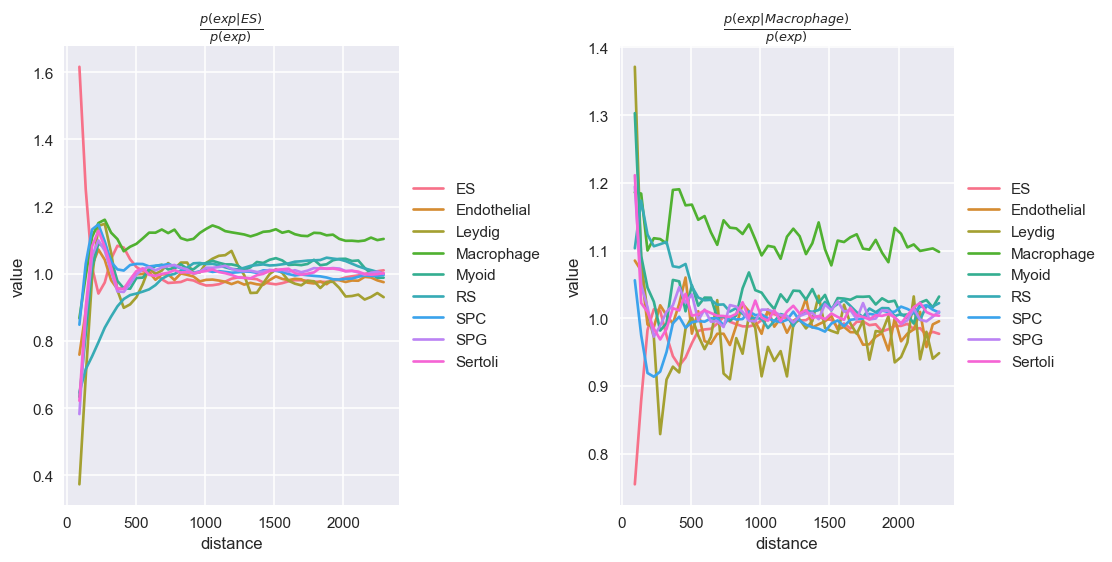

In [21]:
#sq.gr.co_occurrence(adata, cluster_key="cell_type", n_splits=25, n_steps=100)
sq.gr.co_occurrence(adata, cluster_key="cell_type")
sq.pl.co_occurrence(adata, cluster_key="cell_type", clusters=["ES", "Macrophage"])

In [ ]:
#sq.pl.co_occurrence(adata, cluster_key="cell_type", clusters=["RS", "Endothelial", "Sertoli"])
#sq.pl.co_occurrence(adata, cluster_key="cell_type", clusters=["ES", "Leydig", "Macrophage"])
#sq.pl.co_occurrence(adata, cluster_key="cell_type", clusters=["Myoid", "SPC", "SPG"])